In [2]:
#Feyza EKSEN
#504201522
#########################
import numpy as np
from networkx import nx, scale_free_graph, erdos_renyi_graph
import matplotlib.pyplot as plt
import tqdm
import random
##########################


Bad key "text.kerning_factor" on line 4 in
/home/feyza/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## HYPERPARAMETERS

In [3]:
graph_count = 30
number_of_nodes = 200
min_prob_edge_creation = 0.08
max_prob_edge_creation = 0.5 #0.85
probs_edge_creation = np.linspace(min_prob_edge_creation, max_prob_edge_creation, num=graph_count)
min_weight = 1
max_weight = 10
node_draw_size = 1_000 / number_of_nodes #higher the number of nodes, lower the drawing size of the node
seed = 0
np.random.seed(seed)

## Part A: Simulate exponential and free-scale networks (35 Points, 5 points each question)

### 1. Briefly explain how the weighted Erdos-Renyi generative model works.

NOTE: Rewrite this part and remember that weighted is asked.
With given node count $n$ and probability $0 \leq p \leq 1$, the Erdos-Renyi model creates an undirected graph. The graph has edges between all pairs of its nodes with probability $p$ for each edge.

### 2. What are the key properties of weighted Erdos-Renyi (ER) graphs?

NOTE: Rewrite this part and remember that weighted is asked.
The probability $p$ can be expressed in terms of the average value of the average number of links; $p=(E/V) / (V−1)\\ $
Graphs with the same number of links are equally probable

### 3. Briefly explain how weighted scale-free (SF) algorithm works.

Then add your comment!

### 4. What are the key properties of weighted SF graphs?

Then add your comment!

### 5. Visualize two random graphs you simulated (ER and SF).

In [4]:
# TODO: You need to create the graphs by following the algorithm written at the paper.
# 
# barabasi_albert_graph(n, m, seed=None, initial_graph=None)
# https://networkx.org/documentation/latest/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph
# Returns a random graph using Barabási–Albert preferential attachment
# A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

# TODO: https://www.geeksforgeeks.org/barabasi-albert-graph-scale-free-models/

#ER 
print("Creating Erdös-Renyi graphs..")
erdos_renyi_graphs = []
for c in range(graph_count):
    erdos_renyi_G = erdos_renyi_graph(number_of_nodes, probs_edge_creation[c], directed = False) #undirected
    erdos_renyi_graphs.append(erdos_renyi_G)

for G in erdos_renyi_graphs:
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = random.randint(min_weight, max_weight)

#SF
print("Creating Scale-Free graphs..")
scale_free_graphs = []
for c in range(graph_count):
    scale_free_G = scale_free_graph(number_of_nodes) #directed
    scale_free_graphs.append(scale_free_G)

#for G in scale_free_graphs:
#    for (u, v) in G.edges():
#        G.edges[u,v]['weight'] = random.randint(min_weight, max_weight)

Creating Erdös-Renyi graphs..
Creating Scale-Free graphs..


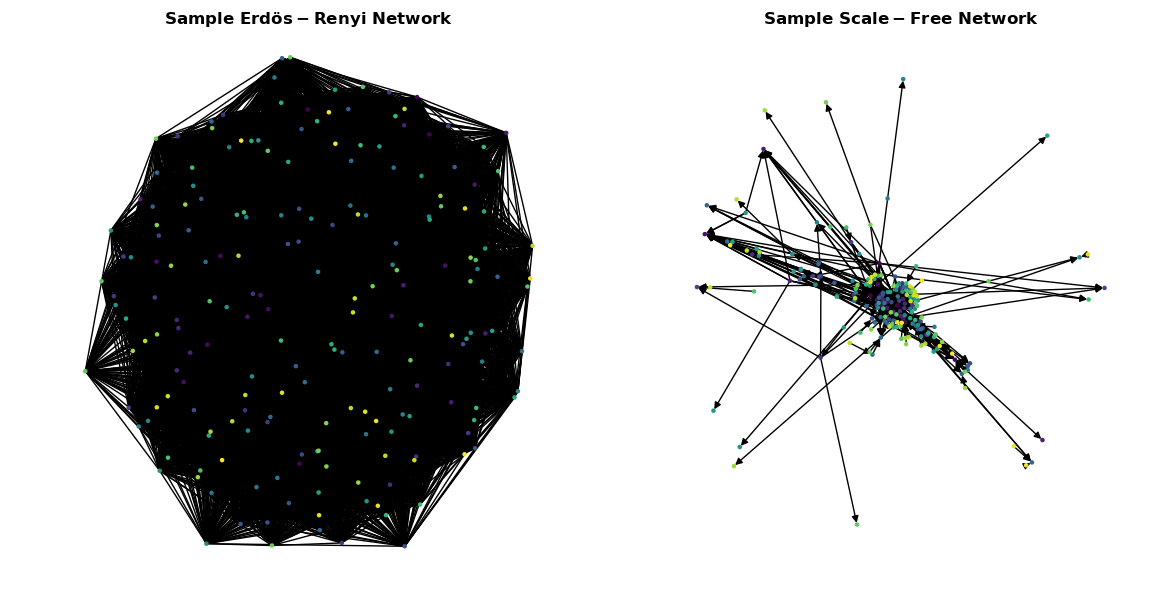

In [5]:
#Plotting ER and SF

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
axes[0].title.set_text(r"$\mathbf{Sample\ Erdös-Renyi\ Network}$")
axes[1].title.set_text(r"$\mathbf{Sample\ Scale-Free\ Network}$")
nx.draw(erdos_renyi_G, ax=axes[0], node_color=range(number_of_nodes), node_size=node_draw_size)
nx.draw(scale_free_G, ax=axes[1], node_color=range(number_of_nodes), node_size=node_draw_size)
plt.show()

### 6. Plot the overlaid distributions of the node strength centrality for all 30 ER graphs (transparent blue color) and the 30 SF graphs (transparent red color). What do you notice? Interpret your observation.

Then add your comment!

### 7. Plot the overlaid distributions of the eigenvector centrality for all 30 ER graphs (transparent blue color) and the 30 SF graphs (transparent red color). What do you notice? Interpret your observation.

Then add your comment!

## Part B: Analyzing Erdos-Renyi and Scale-Free graphs in both random error and target attack scenarios (65 Points)

### 1. [10p] Code up a function called ‘findPercolationThreshold’, where you input a positive weighted adjacency matrix and it automatically outputs its percolation threshold f c .

Then add your comment!

### 2. [5p] Comment out each line of your ‘findPercolationThreshold’ function and add a text box explaining how your algorithm works.

Then add your comment!

### 3. [10p] Code up a function called ‘largestConnectedComponent’, where you input a positive weighted adjacency matrix and it automatically outputs (1) the largest connected component graph, (2) its node size S and (3) its diameter d defined as the average of the shortest paths between all pairs of nodes in the large connected component graph.

Then add your comment!

### 4. [5p] Comment out each line of your ‘largestConnectedComponent’ function and add a text box explaining how your algorithm works.

Then add your comment!

### 5. [5p] Random failure scenario. Code up a function called ‘randomError’, inputting (1) the graph adjacency matrix and (2) the fraction (between 0 and 1) of nodes to be randomly removed and returns the adjancy matrix graph excluding the removed nodes. Comment out the code and explain in a text box how it works.

Then add your comment!

### 6. [5p] Target attack scenario. Code up a function called ‘targetAttack’, inputting (1) the graph adjacency matrix and (2) the fraction (between 0 and 1) of nodes to be attacked removed and returns the adjancy matrix graph excluding the removed nodes. Note that the nodes to be removed are those with the highest strength. Comment out the code and explain in a text box how it works.

Then add your comment!

### 7. [5p] Given one random ER network and one random SF network (you select two from your 60 simulated graphs), plot the diameter d of the largest connected component as in Fig. 2 against the fraction of removed nodes in both random error and target attack scenarios. The nodes need to be removed progressively (e.g., remove 0.1, 0.2, until reaching 0.8). Important note: Watch out for the percolation threshold. You might need to remove a very small fraction of nodes before it breaks ( < 0.1 ). Keep an eye on that. Adjust your fraction step accordingly. Produce 3 more similar plots for 6 randomly selected ER and SF graphs (3 ER and 3 SF). Totally, you will have 4 plots for pairs of ER and SF networks to compare.

Then add your comment!

### 8. [5p] What conclusions can you derive about SF and ER networks and their resilience to random errors and target attacks? Are these conclusions in line with the paper paper[1]?

Then add your comment!

### 9. [5p] Given one random ER network and one random SF network (you select two from your 60 simulated graphs), plot the size S of the LCC of the largest connected component as in Fig. 3 against the fraction of removed nodes in both random error and target attack scenarios. Produce 3 more similar plots for 6 randomly selected ER and SF graphs (3 ER and 3 SF). Totally, you will have 4 plots for pairs of ER and SF networks to compare.

Then add your comment!

### 10. [5p] What conclusions can you derive about SF and ER networks and their resilience to random errors and target attacks? Are these conclusions in line with the paper paper[1]?

Then add your comment!

### 11. [5p] Plot the percolation threshold for each of the 8 sampled graphs using your ‘findPercolationThreshold’ function. Are those thresholds concordents with what we observe in the plots you generated. Discuss and compare. Comparing ER against FS percolation thresholds for the 8 randomly selected networks, what conclusions can you derive?

Then add your comment!